# What makes a neighborhood desirable for an Airbnb place?


This project (Write a Data Science Blog Post) is part of Udacity Data Scientists (Nanodegree Program). i will be using the dataset from Airbnb Boston listings. 

## Introduction

Location, location, location! Anyone who has looked for a house, an apartment or a room has heard these words. Location factors we consider when buying or renting a home includes commute time, schools, and amenities. One important factor that is not as easily measured in location decisions is the neighborhood vibe. Different people prefer different vibes: some want a quiet and family-friendly neighborhood while others prefers a vibrant and eclectic community.

Neighborhood vibe epscially is an important for travellers or short-term residents who are not as concerned about long-term location factors such as school or real estate value. 

Airbnb is the world largest vacation rental online marketplace with over 7 million listings on Airbnb worldwide in 2020. To help guests with their search, Airbnb provides a large amount of information for each listing including geographical location, photos, amenities, and a neighborhood overview written by the host. These descriptions offer a mix of information different qualities of a neighborhood and especially its vibe.

In this article, we will be using are going to use these descriptions from Boston's listing data, to asnwer following questions:

#### 1. Which neighborhoods have the highest number of listings in the city of Boston?
#### 2. Which neighborhoods are rated the highest for their location in the city of Boston?
#### 3. Which vibe qualities are positively negatively correlated with higher review scores location?

In [403]:
# importing libraries

# importing data 
import csv
import pandas as pd 
from collections import Counter

# to make plots
import matplotlib.pyplot as plt
import seaborn as sns

# to run regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# muring warnings 
pd.options.mode.chained_assignment = None  # default='warn'

In [404]:
# reading boston listing file
listing_file = 'listings_boston.csv'
listing_df = pd.read_csv(listing_file)

In [405]:
# viewing the data

# setting the maximum number of columns to 150 so all columns can be displayed
pd.set_option('display.max_columns', 150)

listing_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,$250.00,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,2572247,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,100%,100%,f,https://a2.muscache.com/im/users/2572247/profi...,https://a2.muscache.com/im/users/2572247/profi...,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston, MA 02131, United Sta

In [406]:
# extracting listings and reviews from neighbrohoods with top 20 heighest frequency of reviews
n = 15

# getting the count of listings in all neighborhoods and picking the top 20
top_neighborhoods = listing_df['host_neighbourhood'].value_counts()[:n].index

# Only keeping listings that are in top 20 neighborhoods
top_neighborhoods_df= listing_df[listing_df['host_neighbourhood'].isin(top_neighborhoods)]

## 1. Which neighborhoods have the highest number of listings in the city of Boston?

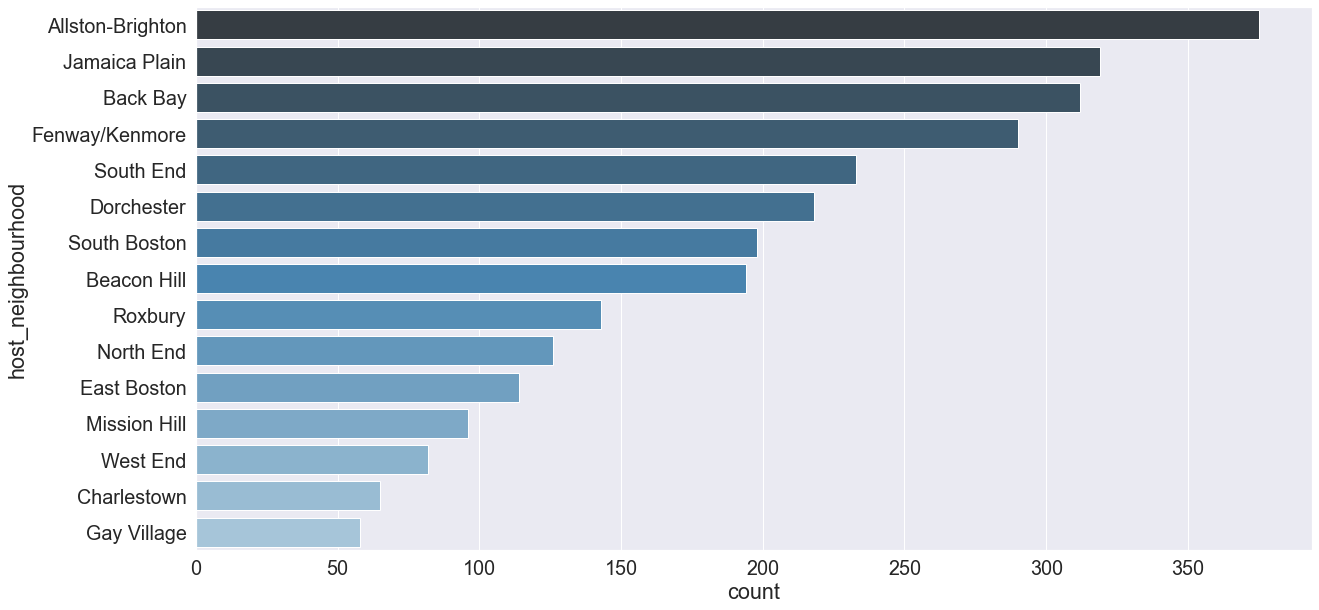

In [407]:
# figure 1- Number of listings in each neighborhood

plt.figure(figsize=(20,10))
sns.set(font_scale=1.8)

ax = sns.countplot(y="host_neighbourhood", data=top_neighborhoods_df, order = top_neighborhoods, palette="Blues_d")

As expected, the highest number of listings are located in touristy areas of Boston, including Allston-Brighton, South End and Back bay.

Some of these neighborhoods such as orth End and Back Bay are close to downtown Boston. Allston-Brighton has a direct and short access to Downtown area as well as Cambridge where Boston's world-class universities are located. 

Jamaica Plain, however, is one of the neighborhoods that is relaively far away from the Downtown but also has one of the highest number of listings on Airbnb. 

## 2. Which neighborhoods are rated the highest for their location in the city of Boston?

In [408]:
# exracting average review score location for each neighborhod
top_neighborhoods_df['review_scores_rating_average'] = top_neighborhoods_df.groupby(by = ['host_neighbourhood']).review_scores_location.transform('mean')

# sorting neighborhoods based on the location review score
top_neighborhoods_df = top_neighborhoods_df.sort_values('review_scores_rating_average', ascending = False)

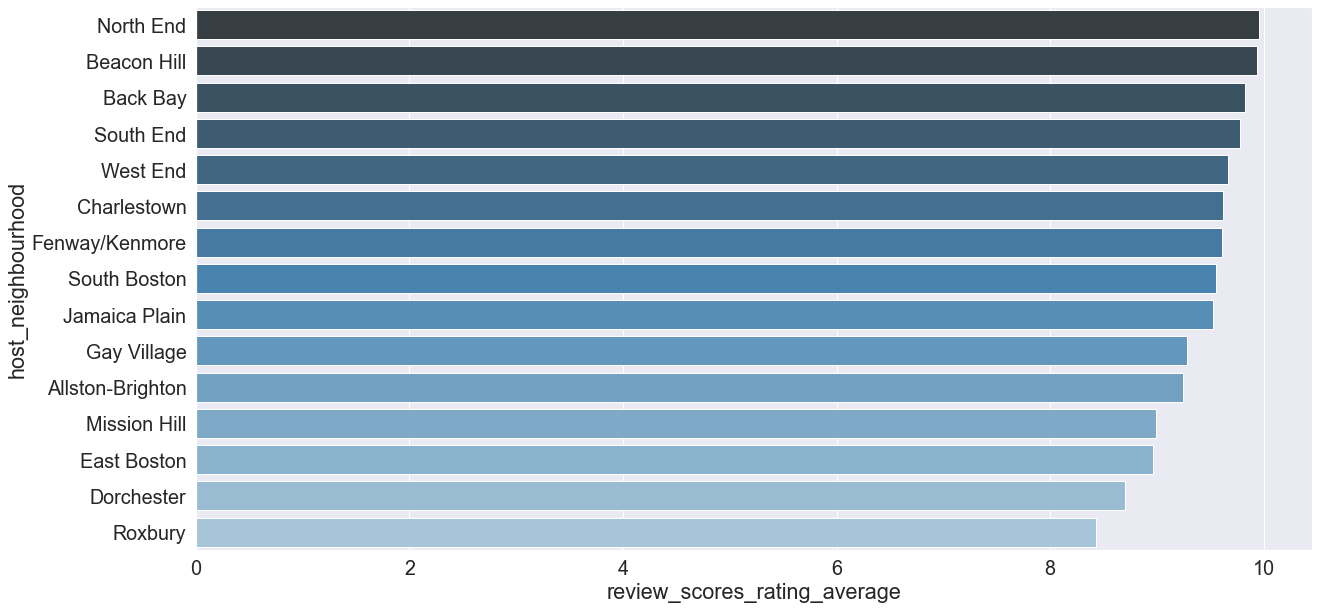

In [409]:
# plotting list of neighborhoods and their average location review score
plt.figure(figsize=(20,10))

g = sns.barplot(x = "review_scores_rating_average",
            y = "host_neighbourhood",
            data = top_neighborhoods_df,
            palette="Blues_d")

Not all neighborhoods are created equal as there is a discrepency in the location review scores between them (Max= 9.95, Min = 8.42). Being very clost to Downtown is what the top 5 neighborhoods have in common. Downtown is the area where a lot of tourist attractions are located and proximity to downtown is an important location advantage for any Airbnb place. However, proximity to downtown is not enough for a good location. Mission Hill and Allston are both relatively close to downtown but they score lower than Jamaica Plain and Roslindale which are both way far away from Downtown. 

## 3. Which vibe qualities are positively or negatively correlated with higher location review scores?

To answer this question we look at the adjectives that have been used by hosts to describe a neighborhood. There is a bias in here that hosts present the neighborhood with a positive tone (Will you rent an Airbnb if the host describes the neighborhood as sketchy?). However, what we can find from this analysis is what positive adjective are correlated with higher review scores. 

To obtain the list of adjectives, we first aggregated all the words used in the neighborhood overview column and removed any words with less than 25 counts. This gave us a list of 705 words which we filtered manually to obtain adjectives that have been used for describing the neighborhood. Here is the list of these words: 

{beautiful, historic, accessible, busy, charming, diverse, eclectic, dynamic, fashionable, friendly, gorgeous, hip, historical, lively, quiet, trendy, upscale, vibrant, walkable}. 

Next, these words were turned into dummy variables to build a regression model to predict the location review scores. 

In [410]:
# remvoing listings without neighbrohood review
listing_df = listing_df.dropna(subset=['neighborhood_overview'])

In [411]:
# aggregating the list of all words used in the neighborhood overview

words = []

for overview in listing_df['neighborhood_overview']:
    try:
        terms = overview.split(' ')
        for term in terms:
            words.append(term)
    except:
        pass

# removing words with a frequency lower than 25
most_used_words = [word for word, count in Counter(words).items() if count > 25]

In [412]:
# list of adjectives extracted through manual review
description_words = ['beautiful', 'historic', 'busy', 'charming', 'diverse', 'eclectic', 
         'dynamic', 'fashionable', 'friendly', 'gorgeous', 'hip', 'historical', 'lively', 'quiet', 
        'trendy', 'upscale', 'vibrant']

# function below takes the overview and returns a list of description words delimited by _
def word_selector(str):
    new_str = '_'

    try:
        for i in str.split(' '):
            if i in description_words:
                i = i.lower()
                i = i.strip('.,')
                new_str += i
                new_str += "_"
    except:
        pass

    return (new_str)


# transforming overviews to dummy variables
top_neighborhoods_df['simplified_comments'] = top_neighborhoods_df['neighborhood_overview'].apply(word_selector)
 
dummies = top_neighborhoods_df['simplified_comments'].str.get_dummies(sep = '_')

# joining the neighborhood list and adjective dummy variables
top_neighborhoods_df = top_neighborhoods_df.join(dummies)

In [413]:
# building the regression model

X = top_neighborhoods_df.groupby('host_neighbourhood').mean()[description_words]
y = top_neighborhoods_df.groupby('host_neighbourhood').mean()['review_scores_location']

lm_model = LinearRegression().fit(X, y)

y_pred = lm_model.predict(X)

# getting coefficients value for each adjective
coefficient_term_list = sorted([[lm_model.coef_[i], description_words[i]] for i in range(len(lm_model.coef_))], 
                              reverse = True)

coefficients_df = pd.DataFrame((coefficient_term_list), 
               columns =['coefficient_value', 'term']) 

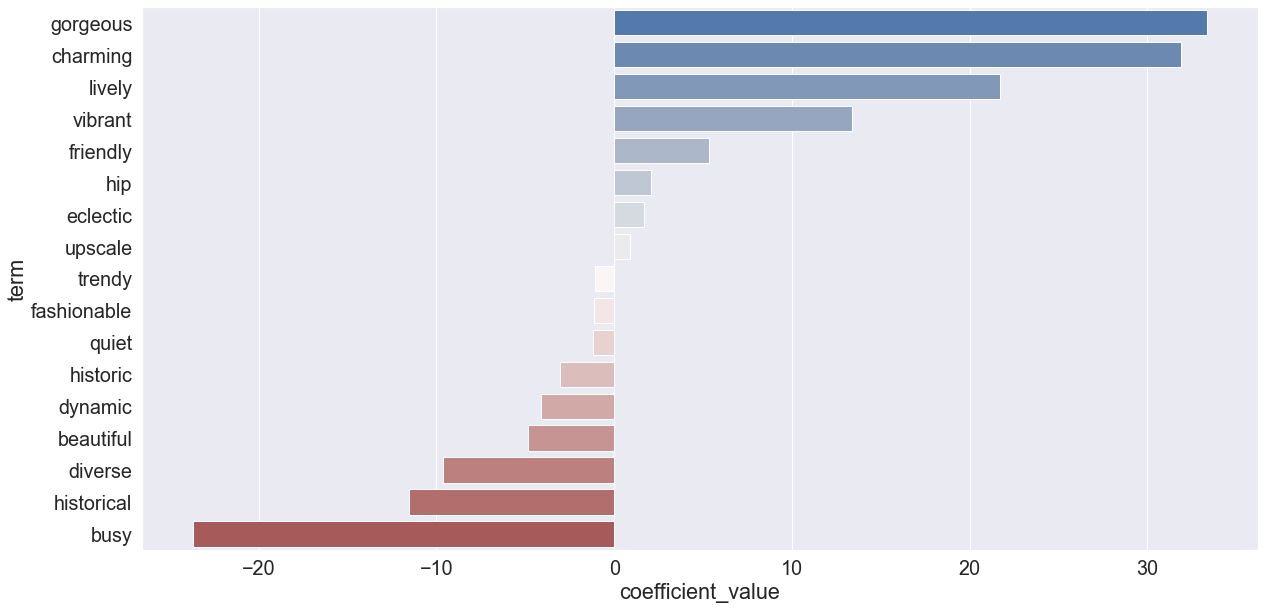

In [414]:
# plotting list of adjectives and their coefficient value
plt.figure(figsize=(20,10))

g = sns.barplot(x = "coefficient_value",
            y = "term",
            data = coefficients_df,
            palette="vlag")

Top 5 words with the **highest positive** correlation with location review score are *gorgeous, charming, lively, vibrant* and *friendly*. This words capture a certain urban image.

Top 5 words with the **highest negative** correlation with location review score are *busy, historical, diverse, beautiful* and *dynamic*.

All of these words can be interpreted in a positive way, however, there are underlying connotations beyond the surface meaning of the word. Words such as gorgeous and charming refers to a certain kind of aesthetics that is different from fashionable or upscale. Also, the adjective *diverse* can be interpreted in many different ways. These conntations need to be addressed more closely in the future by researchers in anthorpology and urban studies. 

## Conclusion
In this article, we took a look at Airbnb listing in the city of Boston.

When we looked at neighborhoods rated the highest for their location, we found out that neighborhoods closest to the downtown area have also the highest rates. This can be explained by the fact that most tourists in Boston want to visit the Downtown. 

We also analyzed the words used by hosts to describe neighborhoods and their correlation with the location rating. We found out that there are certain words such as *gorgeous, charming, lively* and *vibrant* are positively correlated with the location review scores of neighborhoods. 

#### References
Airbnb Dataset
https://www.kaggle.com/airbnb/boston
Medium Article
https://bit.ly/3iFEaOK